### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import plotly.express as px

In [2]:
df = pd.read_csv('Mall_Customers.csv', index_col = 0)

In [3]:
# Функция для автоматизация анализа данных
def analyze_dataframe(df):
    print('Первых 5 строк данных:')
    display(df.head())
    
    print('Размер данных (количество строк и столбцов):')
    display(df.shape)
    
    print('Описание данных:')
    display(df.describe())
    
    print('Количетво дублирующихся строк:')
    display(df.duplicated().sum())
    
    print('Количество пропущенных значений в каждом столбце:')
    display(df.isnull().sum())
    
analyze_dataframe(df)

Первых 5 строк данных:


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


Размер данных (количество строк и столбцов):


(200, 4)

Описание данных:


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Количетво дублирующихся строк:


0

Количество пропущенных значений в каждом столбце:


Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Encoding Gender as a numerical feature

In [4]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
# Selecting features for clustering
features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

In [6]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Using the Elbow Method to determine the optimal number or clusters
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters = n, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

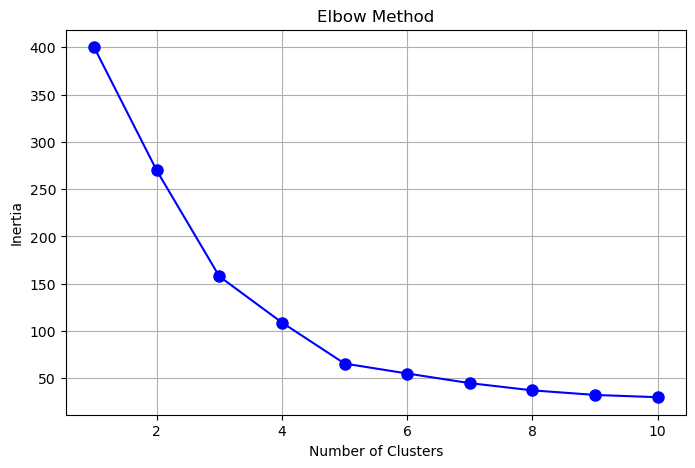

In [8]:
# Plotting the Elbow Curve
plt.figure(figsize = (8, 5))
plt.plot(range(1, 11), inertia, 'bo-', markersize = 8)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid()
plt.show()

- Based on the Elbow Method, the optimal number of clusteres is 5 

In [9]:
# Using Silhoette scores to determine the optimal number of clusters
silhouette_scores = {}
for n_clusters in [2, 3, 4, 5, 6, 7]:
    kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_scores[n_clusters] = silhouette_score(X_scaled, cluster_labels)

print(f"Silhouette Score for 2 clusters: {silhouette_scores[2]:.3f}")
print(f"Silhouette Score for 3 clusters: {silhouette_scores[3]:.3f}")
print(f"Silhouette Score for 4 clusters: {silhouette_scores[4]:.3f}")
print(f"Silhouette Score for 5 clusters: {silhouette_scores[5]:.3f}")
print(f"Silhouette Score for 6 clusters: {silhouette_scores[6]:.3f}")
print(f"Silhouette Score for 7 clusters: {silhouette_scores[7]:.3f}")
print("\n")

# Deternine the optimal number of clusters based on Silhoutte Scores
optimal_clusters = max(silhouette_scores, key = silhouette_scores.get)
print(f'Optimal number of clusters based on Silhoutte Score: {optimal_clusters}')

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

Silhouette Score for 2 clusters: 0.321
Silhouette Score for 3 clusters: 0.467
Silhouette Score for 4 clusters: 0.494
Silhouette Score for 5 clusters: 0.555
Silhouette Score for 6 clusters: 0.540
Silhouette Score for 7 clusters: 0.528


Optimal number of clusters based on Silhoutte Score: 5


- The Silhouette Score was highest for 5 clusters (0, 555), indicating that 5 clusters provide the best balance between compactness and separation of clusters. This score demonstrates that the data is well-separated into distinct groups, and the clusters are relatively dense. 

In [11]:
# Apply k-means clustering
kmeans = KMeans(n_clusters = optimal_clusters, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


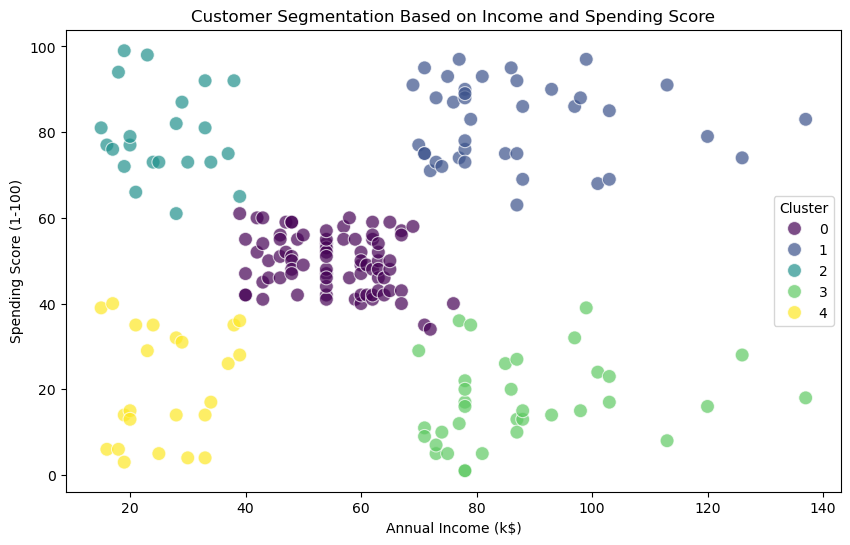

In [22]:
# Visualizing the clusters
plt.figure(figsize = (10, 6))
sns.scatterplot( x = 'Annual Income (k$)', y = 'Spending Score (1-100)',
                hue = 'Cluster', data= df, palette = 'viridis', s = 100, alpha = 0.7)
plt.title('Customer Segmentation Based on Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title = 'Cluster')
plt.show()

In [13]:
# Analyzing Cluster Properties
df.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.592593,42.716049,55.296296,49.518519
1,0.538462,32.692308,86.538462,82.128205
2,0.590909,25.272727,25.727273,79.363636
3,0.457143,41.114286,88.200000,17.114286
4,0.608696,45.217391,26.304348,20.913043
